# **Lending Club Case Study - DATA WRANGLING**

**Data**

We have been provided with the Private Data of Lending Club.
The complete loan data for all loans issued through the time period 2012 to 2018.

We also have a data dictionary which describes the meaning of these variables.

Let's start with importing all the required libraries for the analysis.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
#from pandas_profiling import ProfileReport
sns.set(style='whitegrid')


%matplotlib inline
 
rcParams['figure.figsize'] = 14,6
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv
/kaggle/input/lcdatadictionaryxlsx/LCDataDictionary.xlsx


Reading the loan data file

In [4]:
df = pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', low_memory = False)

In [5]:
#pd.options.display.max_rows = 1000
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**Feature Description**

In [6]:
exc = pd.read_excel('/kaggle/input/lcdatadictionaryxlsx/LCDataDictionary.xlsx').dropna()
pd.options.display.max_colwidth =100
exc.set_index('LoanStatNew', inplace=True)
exc

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
...,...
settlement_status,"The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CAN..."
settlement_date,The date that the borrower agrees to the settlement plan
settlement_amount,The loan amount that the borrower has agreed to settle for


**Data Cleaning**

Checking Data for null values and data types. Since data shape is very large descibe() functionality wasn't applied.**

In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

Checking for Missing Values Percentage for each feature or columns and showing columns with missing values.

In [8]:
def miss_features(df,perc=0):
    missing = round(100*(df.isnull().sum()/len(df.id)), 2)
    missing_perc = pd.DataFrame(missing.loc[missing>perc])
    return missing_perc

LIST OF ALL FEATURES WITH MISSING DATA

In [9]:
pd.options.display.max_rows = 1000
missing_perc = miss_features(df)
print("Number of features with missing values", len(missing_perc[0]))
print(missing_perc)

Number of features with missing values 102
                                                 0
member_id                                   100.00
emp_title                                     7.39
emp_length                                    6.50
desc                                         94.42
title                                         1.03
dti                                           0.08
mths_since_last_delinq                       51.25
mths_since_last_record                       84.11
revol_util                                    0.08
last_pymnt_d                                  0.11
next_pymnt_d                                 59.51
collections_12_mths_ex_med                    0.01
mths_since_last_major_derog                  74.31
annual_inc_joint                             94.66
dti_joint                                    94.66
verification_status_joint                    94.88
tot_coll_amt                                  3.11
tot_cur_bal                            

In [10]:
#Fuction to check feature information

def feat_info(df,a=0):
    tmp = {}
    for i in df:
        try:
            tmp[i] = exc.loc[i]
        except:
            if (a==0):
                tmp[i] = "Not Found"
            else:
                pass
    pd.options.display.max_colwidth = 50
    return pd.DataFrame.from_dict(tmp).T

 ####  Information of List of features with data missing 

In [11]:
columns_with_missing_values = list(missing_perc[missing_perc > 0].index)
pd.options.display.max_colwidth = 150
print(feat_info(columns_with_missing_values))
len(columns_with_missing_values)

                                                                                  Description
member_id                                    A unique LC assigned Id for the borrower member.
emp_title                                   The job title supplied by the Borrower when ap...
emp_length                                  Employment length in years. Possible values ar...
desc                                                Loan description provided by the borrower
title                                                 The loan title provided by the borrower
dti                                         A ratio calculated using the borrower’s total ...
mths_since_last_delinq                      The number of months since the borrower's last...
mths_since_last_record                      The number of months since the last public rec...
revol_util                                  Revolving line utilization rate, or the amount...
last_pymnt_d                                                

102

Features without any information will be dropped

In [12]:
col_to_drop = ['total_rev_hi_lim','verification_status_joint','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line','sec_app_inq_last_6mths',
'sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog']
df = df.drop(col_to_drop,axis=1)
df.shape

(2260701, 137)

Features with missing values remaining

In [13]:
missing_perc = miss_features(df)
print("Number of missing features: ", len(missing_perc[0]))
print(missing_perc)

Number of missing features:  88
                                                 0
member_id                                   100.00
emp_title                                     7.39
emp_length                                    6.50
desc                                         94.42
title                                         1.03
dti                                           0.08
mths_since_last_delinq                       51.25
mths_since_last_record                       84.11
revol_util                                    0.08
last_pymnt_d                                  0.11
next_pymnt_d                                 59.51
collections_12_mths_ex_med                    0.01
mths_since_last_major_derog                  74.31
annual_inc_joint                             94.66
dti_joint                                    94.66
tot_coll_amt                                  3.11
tot_cur_bal                                   3.11
open_acc_6m                                  38.31

There are columns in the data with 100% missing values. Removing all the columns with more than 30% missing values. There were 58 columns with more than 30% values as missing. Removing such columns as these columns mostly add noise and wont help in analysis.

In [14]:
miss_30 = miss_features(df,perc=30)
list_m30 = list(miss_30[miss_30 >= 30].index)
len(list_m30)

45

In [15]:
df = df.drop(list_m30,axis=1)
df.shape

(2260701, 92)

Checking remaining missing data featuers. After removing such columns 93 columns remain. Let's examine further for missing values. Checking percentage of data missing for remaining features.

In [16]:
miss_feat = miss_features(df)
print(miss_feat)

                                0
emp_title                    7.39
emp_length                   6.50
title                        1.03
dti                          0.08
revol_util                   0.08
last_pymnt_d                 0.11
collections_12_mths_ex_med   0.01
tot_coll_amt                 3.11
tot_cur_bal                  3.11
acc_open_past_24mths         2.21
avg_cur_bal                  3.11
bc_open_to_buy               3.32
bc_util                      3.37
chargeoff_within_12_mths     0.01
mo_sin_old_il_acct           6.15
mo_sin_old_rev_tl_op         3.11
mo_sin_rcnt_rev_tl_op        3.11
mo_sin_rcnt_tl               3.11
mort_acc                     2.21
mths_since_recent_bc         3.25
mths_since_recent_inq       13.07
num_accts_ever_120_pd        3.11
num_actv_bc_tl               3.11
num_actv_rev_tl              3.11
num_bc_sats                  2.59
num_bc_tl                    3.11
num_il_tl                    3.11
num_op_rev_tl                3.11
num_rev_accts 

Checking features cardinality to drop further values. Very high cardinal features will be removed to get better correlation. 

In [17]:
miss_list = miss_feat.index.tolist()
for i in miss_list:
    if len(df[i].unique())<20:
           print("Unique " ,i,":", len(df[i].unique()))

Unique  emp_length : 12
Unique  collections_12_mths_ex_med : 17
Unique  chargeoff_within_12_mths : 12
Unique  num_tl_120dpd_2m : 8
Unique  num_tl_30dpd : 6
Unique  pub_rec_bankruptcies : 13


In [18]:
for i in miss_list:
    if len(df[i].unique())<20:
        print(i, exc.loc[i])
        print("Unique " ,i,":", df[i].unique(),"\n\n")

emp_length Description    Employment length in years. Possible values ar...
Name: emp_length, dtype: object
Unique  emp_length : ['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' nan] 


collections_12_mths_ex_med Description    Number of collections in 12 months excluding m...
Name: collections_12_mths_ex_med, dtype: object
Unique  collections_12_mths_ex_med : [ 0.  1.  2.  3.  4.  5.  7. 10.  6. 14. nan  8. 20.  9. 11. 12. 16.] 


chargeoff_within_12_mths Description    Number of charge-offs within 12 months
Name: chargeoff_within_12_mths, dtype: object
Unique  chargeoff_within_12_mths : [ 0.  1.  2.  3.  6.  7.  4.  5.  9. 10. nan  8.] 


num_tl_120dpd_2m Description    Number of accounts currently 120 days past due...
Name: num_tl_120dpd_2m, dtype: object
Unique  num_tl_120dpd_2m : [ 0. nan  1.  2.  6.  3.  7.  4.] 


num_tl_30dpd Description    Number of accounts currently 30 days past due ...
Name: num_tl_30dpd, dtyp

The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens, range of values that these categorical columns can take is not of any significant impact to the analysis.
We can decide to drop these columns for analysis.

In [19]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

In [20]:
df = df.drop(drop_columnlist,axis=1)
df.shape

(2260701, 89)

Checking number of null values in featues

In [21]:
print(feat_info(miss_features(df).index))

                                                                  Description
emp_title                   The job title supplied by the Borrower when ap...
emp_length                  Employment length in years. Possible values ar...
title                                 The loan title provided by the borrower
dti                         A ratio calculated using the borrower’s total ...
revol_util                  Revolving line utilization rate, or the amount...
last_pymnt_d                                  Last month payment was received
tot_coll_amt                               Total collection amounts ever owed
tot_cur_bal                             Total current balance of all accounts
acc_open_past_24mths               Number of trades opened in past 24 months.
avg_cur_bal                           Average current balance of all accounts
bc_open_to_buy                      Total open to buy on revolving bankcards.
bc_util                     Ratio of total current balance to hi

In [22]:
print(miss_features(df))

                                0
emp_title                    7.39
emp_length                   6.50
title                        1.03
dti                          0.08
revol_util                   0.08
last_pymnt_d                 0.11
tot_coll_amt                 3.11
tot_cur_bal                  3.11
acc_open_past_24mths         2.21
avg_cur_bal                  3.11
bc_open_to_buy               3.32
bc_util                      3.37
mo_sin_old_il_acct           6.15
mo_sin_old_rev_tl_op         3.11
mo_sin_rcnt_rev_tl_op        3.11
mo_sin_rcnt_tl               3.11
mort_acc                     2.21
mths_since_recent_bc         3.25
mths_since_recent_inq       13.07
num_accts_ever_120_pd        3.11
num_actv_bc_tl               3.11
num_actv_rev_tl              3.11
num_bc_sats                  2.59
num_bc_tl                    3.11
num_il_tl                    3.11
num_op_rev_tl                3.11
num_rev_accts                3.11
num_rev_tl_bal_gt_0          3.11
num_sats      

The columns emp_title, emp_length have 7.39% and 6.50% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these variables. Other variables have very less data missing compared to total data size. So, let's remove the rows with the missing features. Many features are similar that would impact our analysis negatively, so they are removed. 

Now, we have now reduced the data set to have 1652452 loan records and 90 attributes with no missing values. 

In [23]:
loan = df.dropna()
loan.shape

(1652452, 89)

Let's now summarise and save the data to a new clean data file

In [24]:
#clean_loan = df.sample(n=100000)
#clean_loan.shape

In [25]:
#clean_loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

# EXPLORATORY DATA ANALYSIS (EDA)

We are trying to answer many questions such as:

* What's the distribution of Loan Status?
* What's the distribution of Amount of loans?
* What's the distribution of Interest Rate?
* What's the % of Defaults in loans?
* What's the most common grades?
* What's the most common employer titles?
* What's the most common Purpose that a client request a loan?
* What's the different between Terms?
* And a lot of other questions that will raise through the exploration


Our aim is to predict whether the loan will default or not based on our data.
So, let's understand which type of category values we have and which loans to select loans
that are fully paid and that are not fully paid, removing current loans

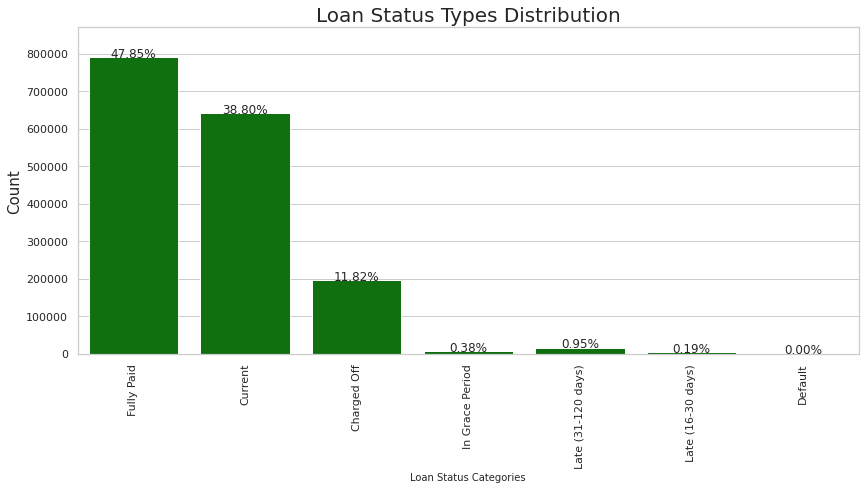

In [26]:
total = len(loan)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=loan, color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Loan Status Categories", fontsize=10)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)

sizes = []

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [27]:
loan = loan.loc[loan['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
loan.shape

(986041, 89)

**Purpose**


Purpose - A category provided by the borrower for the loan request.
As it a categorical feature that says what's the purpose to the loan, would be interesting to start by Purpose.

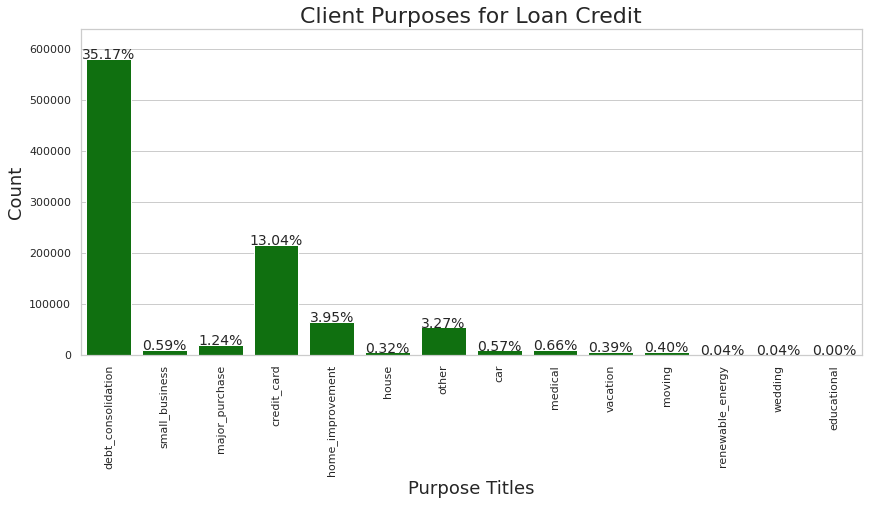

In [28]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=loan, color='green')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**The top 3 purposes are:**

* 35.17% of the Loans are to Debt Consolidation
* 13.04% are to pay Credit Card
* 3.95% to Home Improvement
* and many others purposes that sums 47.83%

**LOAN AMOUNT and INTEREST RATE Distributions**

**Loan Amount** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**intRate** - Interest Rate on the loan

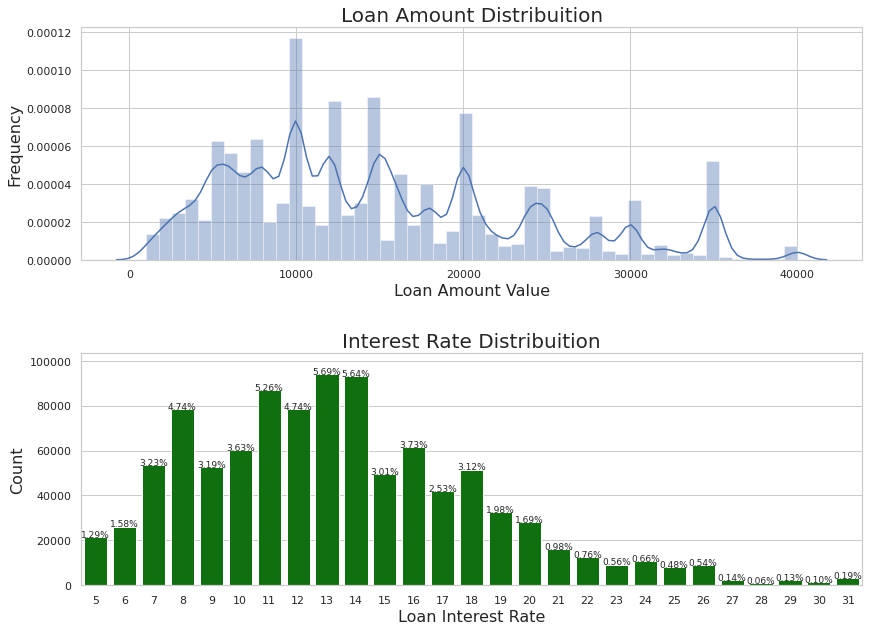

In [29]:
loan['int_round'] = loan['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(loan["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=loan, color='green')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)

sizes=[] # Get highest values in y

for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=9) 

g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

**LOAN STATUS**

In [30]:
loan.loc[loan.loan_status == 'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
loan.loc[loan.loan_status == 'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

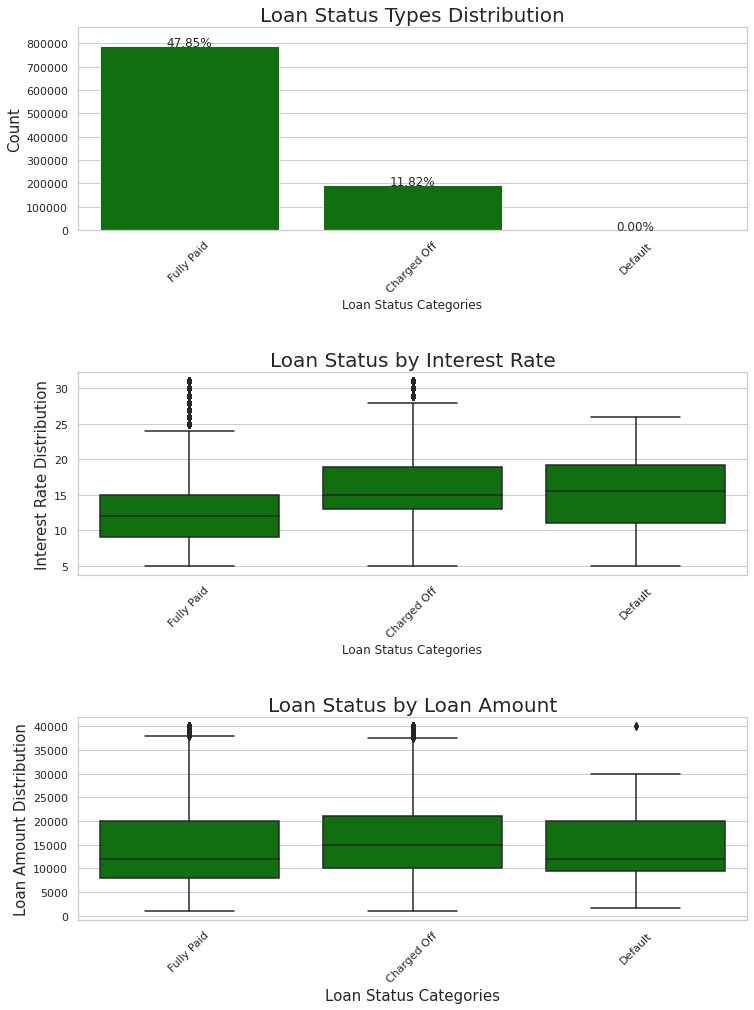

In [31]:
plt.figure(figsize = (12,16))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=loan, color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="int_round", data=loan, color='green')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=loan, color='green')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

We can see that People that Not meet the credit policy has a lowest values in amount distribution.

In [32]:
loan['issue_month'], loan['issue_year'] = loan['issue_d'].str.split('-', 1).str

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


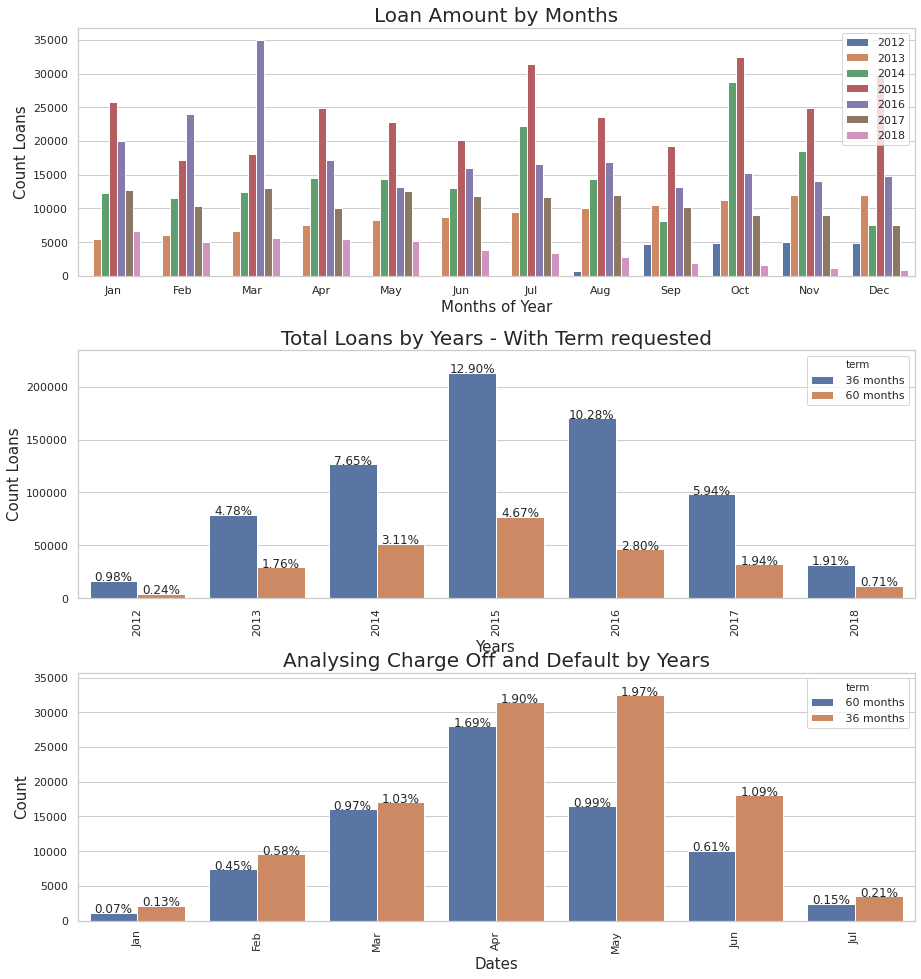

In [33]:
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order,ordered=True)


plt.figure(figsize = (15,16))

#Issue_d x loan_amount
plt.subplot(311)
g = sns.countplot(x='issue_month', hue='issue_year', data=loan)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months of Year", fontsize=15)
g.set_ylabel("Count Loans", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)


#Looking the count of defaults though the issue_d that is The month which the loan was funded
plt.subplot(312)
g1 = sns.countplot(x='issue_year', hue='term', data=loan)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel("Years", fontsize=15)
g1.set_ylabel("Count Loans", fontsize=15)
g1.set_title("Total Loans by Years - With Term requested", fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10)


#Looking the count of defaults though the issue_d that is The month which the loan was funded
plt.subplot(313)
g2 = sns.countplot(x='issue_year', data=loan.loc[(loan['loan_status'] == 'Charged Off') | (loan['loan_status'] == 'NMCP Charged Off') | (loan['loan_status'] == 'Default')],hue='term',)
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
g2.set_xlabel("Dates", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Analysing Charge Off and Default by Years", fontsize=20)


sizes=[]
for p in g2.patches:
    height = p.get_height()
    sizes.append(height)
    g2.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
g2.set_ylim(0, max(sizes) * 1.10)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()


We can note that the peak of loans was in March 2016. Going depth in the default exploration to see the amount and counting though the ISSUE_D ,
that is: The month which the loan was funded

**Crosstab - Purpose by Loan Status**

In [34]:
#Exploring the loan_status by purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(loan[purp_loan[0]], loan[purp_loan[1]],normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
purpose,,,
car,0.710000,7.140000,1.020000
credit_card,18.430000,17.860000,22.700000
debt_consolidation,62.370000,57.140000,58.100000
educational,0.000000,0.000000,0.000000
home_improvement,5.830000,3.570000,6.810000
house,0.590000,3.570000,0.520000
major_purchase,2.000000,3.570000,2.090000
medical,1.180000,7.140000,1.080000
moving,0.790000,0.000000,0.630000


**Crosstab - Loan Status by Grade**

In [40]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan[loan_grade[0]], loan[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,9307,36463,62861,44757,27288,11107,3605
Default,4,6,5,9,4,0,0
Fully Paid,154854,247683,222989,104465,43535,13488,3611


**Interest Rate by Grade and Loan_status**

In [43]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(loan[loan_grade[0]], loan[loan_grade[1]],values=loan['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.400000,10.780000,14.090000,17.800000,21.190000,25.190000,28.080000
Default,7.190000,11.040000,14.110000,19.050000,25.150000,0.000000,0.000000
Fully Paid,7.100000,10.640000,14.020000,17.750000,21.250000,25.090000,27.870000


**Crosstab - Loan Status by Application Type**

In [44]:
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan[loan_application[0]], loan[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,Individual,Joint App
loan_status,,
Charged Off,191039,4349
Default,24,4
Fully Paid,776333,14292


**Employment Features**

In [46]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

In [49]:
trace0 = go.Bar(
    x = loan.emp_title.value_counts()[:40].index.values,
    y = loan.emp_title.value_counts()[:40].values,
    marker=dict(color=loan.emp_title.value_counts()[:40].values))

data = [trace0]

layout = go.Layout(yaxis=dict(title='Count'),xaxis=dict(title='Employment name'),title='TOP 40 Employment Title')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

Teachers seems to be highest count for borrowers followed by Manager and Owner

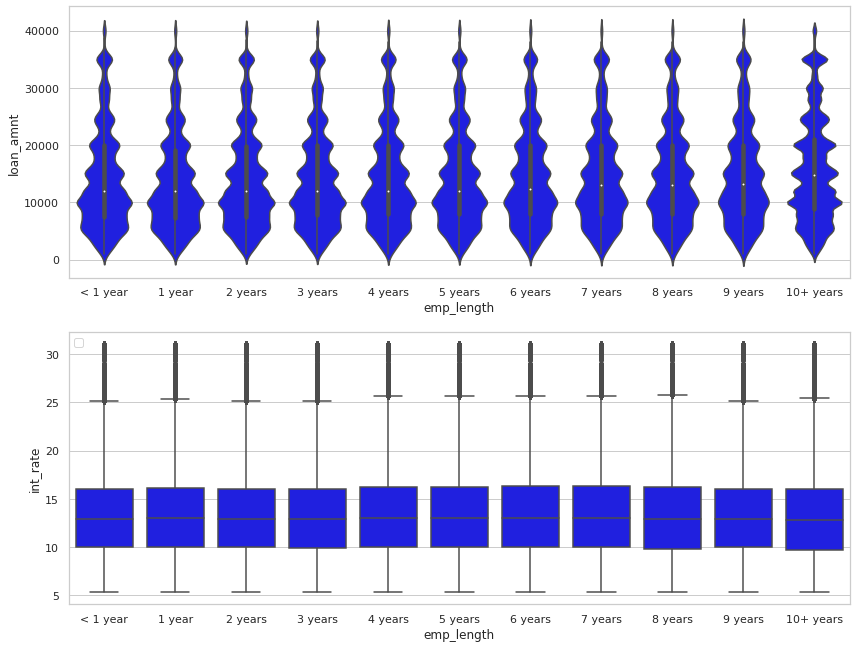

In [51]:
emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))

z = sns.violinplot(x="emp_length", y="loan_amnt",data=loan, 
                   ax=ax[0], color='blue',
                   order=emp_ord)

g = sns.boxplot(x="emp_length", y="int_rate", data=loan,
                ax=ax[1], color='blue',
                order=emp_ord)


               
plt.legend(loc='upper left')
plt.show()

We can see that the years do not influence the interest rate but it have a slightly difference considering the loan_amount patterns

cross tab of  State and Loan Status

In [53]:
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(loan[adress_loan[0]], 
                  loan[adress_loan[1]], 
                  normalize='all')*100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
addr_state,,,
AK,0.050000,0.000000,0.200000
AL,0.280000,0.000000,0.950000
AR,0.180000,0.000000,0.580000
AZ,0.470000,0.000000,1.990000
CA,2.760000,0.000000,11.390000
CO,0.310000,0.000000,1.650000
CT,0.260000,0.000000,1.230000
DC,0.030000,0.000000,0.200000
DE,0.060000,0.000000,0.230000


We can see California, Florida, Illinois and Texas have higest borrowers

> # 